# Carlos Cantu  
# Sentiment Model 

# Milestone 1

Cancer, a devastating disease characterized by the uncontrolled division of abnormal cells leading to the destruction of body tissues, remains a formidable challenge despite significant advancements in modern medicine. While tremendous strides have been made in the fight against cancer, it is essential to recognize that the battle for life not only impacts the physical aspect but also profoundly affects the mental well-being of patients. Understanding the psychological state of individuals diagnosed with different forms of cancer is paramount for medical professionals. It directly influences treatment adherence, necessitates the development of effective coping strategies, calls for targeted communication approaches, and underscores the importance of providing holistic patient care.

The significance of comprehending the mental state of cancer patients is underscored by its far-reaching implications on their overall health outcomes. Patients grappling with the emotional toll of cancer may face challenges in adhering to prescribed treatments, making it imperative for healthcare providers to tailor interventions that address both the physical and psychological dimensions of their well-being.

In line with this, our analysis aims to undergo the development of a sentiment model, utilizing the dataset labeled "Mental_Health." This dataset encompasses five key columns, including:

    Text Responses of Patients and Caregivers:
        This column holds valuable qualitative data, offering insights into the sentiments expressed by patients and their caregivers.

    Sentiment Prediction:
        The sentiment prediction column provides a quantitative assessment of the emotional tone in the text responses, helping to categorize sentiments as positive, negative, or neutral.

    Intensity (Scale of -2 to 1):
        Intensity, measured on a scale from -2 to 1, provides a nuanced understanding of the strength of emotions expressed in the text.

    Type of Cancer:
        This column categorizes the type of cancer diagnosed in each patient, providing context for understanding potential variations in emotional responses across different cancer types.

    Hospital of Patient:
        The hospital column identifies the healthcare facility associated with each patient, which could influence the overall patient experience and emotional well-being.

Our initial exploration will delve into the various features and characteristics present in the "Mental_Health" dataset. This exploration is pivotal for gaining insights into the emotional aspects of patients undergoing cancer, paving the way for the development of a robust sentiment model. By deciphering patterns within the data, we aim to better understand and predict the mental states of patients, contributing to more personalized and empathetic healthcare interventions for those navigating the complex journey of cancer diagnosis and treatment.

## Load the data set 

In [5]:
import pandas as pd 
df = pd.read_csv('/Users/cantu/Documents/Data Science Masters/Data Mining DSC550/Source Files 550/Mental_Health.csv')
df

,posts,predicted,intensity,cancer,hospital
0,I know as parent of child with down syndrome t...,negative,-1,Leukemia,Harris Health
1,but in my heart I know this is the future prom...,neutral,0,Lung,Lubbock Heart
2,I have mylefibrosis which turn to leukemia the...,negative,-1,Lung,Harris Health
3,from one of my health group subject wayne dyer...,neutral,0,Lung,Methodist
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0,Lung,Lubbock Heart
...,...,...,...,...,...
10387,hey everyone I am a 25 year old male I work ou...,negative,-1,Leukemia,Lubbock Heart
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2,Brain,Eastland Memorial
10389,the doctor advise we he could not remove the a...,neutral,0,Liver,Methodist
10390,my 66 year old father have been through so muc...,neutral,0,Brain,Harris Health


## Exploratory Graphical Analysis

### Distribution of 'predicted'

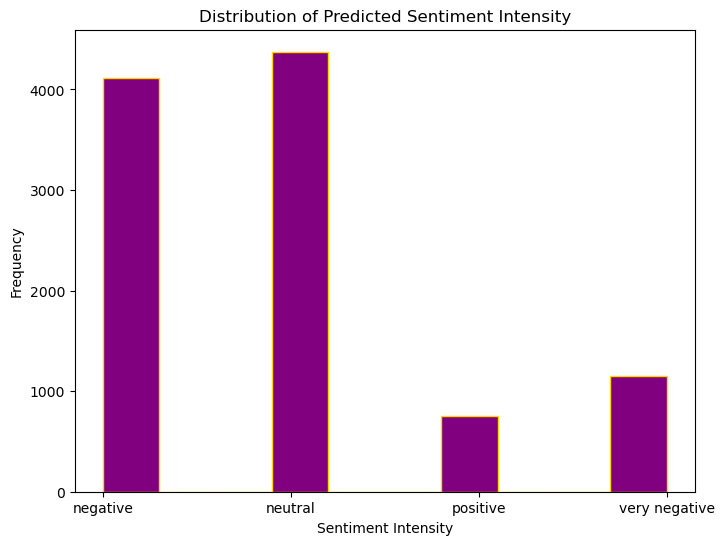

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['predicted'], bins= 10, color='purple', edgecolor='gold')

# lables 
plt.xlabel('Sentiment Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Sentiment Intensity')

#  plot
plt.show()


The prevailing trend of a high distribution in negativity and a lower frequency of very negative responses is noteworthy. It suggests that, on average, sentiments expressed by patients tend to lean towards the neutral and negative spectrum. This observation aligns with the expectation that discussions about health conditions, such as cancer, often involve concerns, challenges, and emotional struggles.

### Intensity and Predicted Scatter 

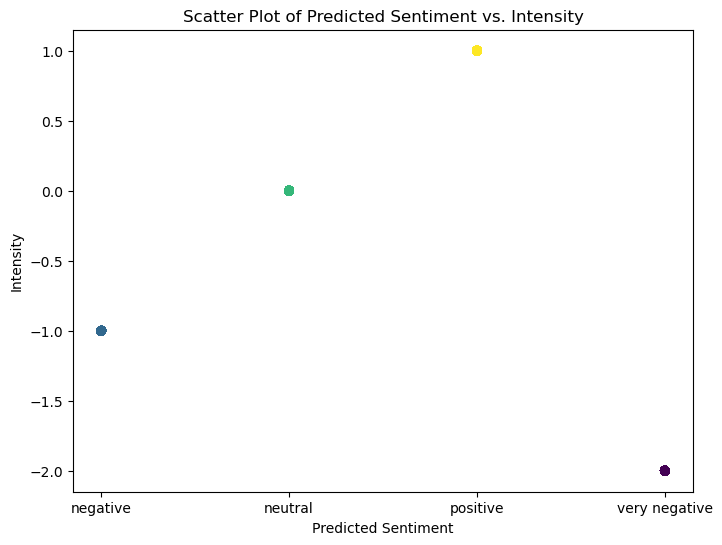

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['predicted'], df['intensity'], c=df['intensity'], cmap='viridis', alpha=0.7)

# labels
plt.xlabel('Predicted Sentiment')
plt.ylabel('Intensity')
plt.title('Scatter Plot of Predicted Sentiment vs. Intensity')

# show 
plt.show() 

Visualizing the mapping of sentiment intensity to sentiment predictions, ranging from -2 (very negative) to 1 (positive), provides a nuanced understanding of emotional dynamics within the dataset. 

### Understanding the Distribution of Cancer Types 

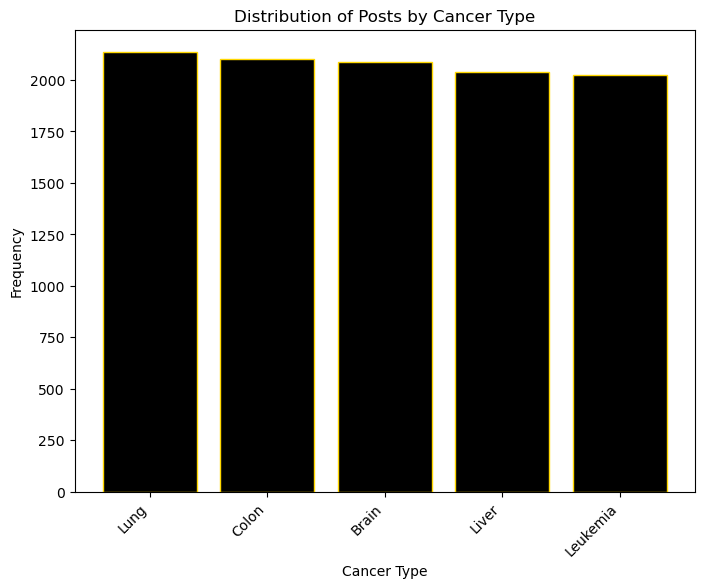

In [14]:
cancer_count = df['cancer'].value_counts()
# find unique cancer
cancer_type = cancer_count.index
counts = cancer_count.values 

# plot
plt.figure(figsize=(8,6))
plt.bar(cancer_type, counts, color='black', edgecolor='gold')

# lables 
plt.xlabel('Cancer Type')
plt.ylabel('Frequency')
plt.title('Distribution of Posts by Cancer Type')

#  better readability
plt.xticks(rotation=45, ha='right')

# show 
plt.show()


The evenly distributed nature of the various cancer types, as depicted in the bar chart, suggests that the type of cancer does not exert a substantial influence on the overall sentiment expressed in the dataset. This observation implies a degree of universality in the emotional experiences shared across different cancer categories. 

### Understanding the Distribution of Hospitals  

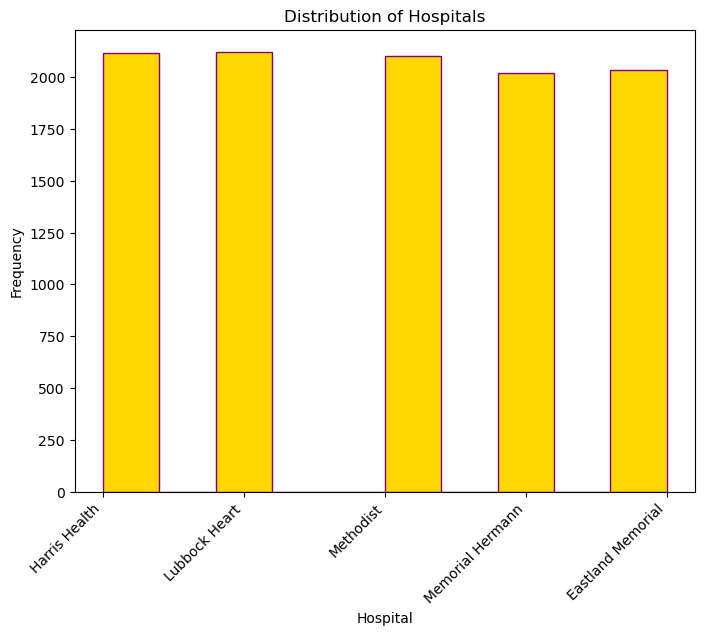

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['hospital'], bins= 10, color='gold', edgecolor='purple')
plt.xticks(rotation=45, ha='right') # rotates the hospitals they were overlapping
# lables 
plt.xlabel('Hospital')
plt.ylabel('Frequency')
plt.title('Distribution of Hospitals')

#  plot
plt.show()

Initially assuming that hospital data would be arbitrary and trivial, with no significant impact on a patient's mental health, the exploration of the predictive sentiment model aimed to confirm this hypothesis. The distribution of sentiments across different hospitals, as depicted in the histogram, indeed reveals a relatively even spread. This even distribution suggests that the choice of hospital does not exert a discernible influence on the sentiments expressed in the dataset. These results align with the expectation that sentiments related to health discussions may be more influenced by universal factors, such as the nature of the medical condition, treatment experiences, and emotional challenges, rather than specific hospital affiliations.

### Graphical Analysis Overview 

The sentiment analysis of the dataset indicates a prevailing tendency towards neutral and negative sentiments, particularly evident in discussions related to cancer. The visualization of sentiment intensity against sentiment predictions adds nuance to our understanding of the emotional spectrum, spanning from -2 (very negative) to 1 (positive). The uniform distribution of various cancer types suggests that the specific type of cancer does not significantly influence overall sentiment expression, supporting the notion of a universal emotional experience across different cancer categories and emphasizing its negligible impact on sentiment. As expected, the choice of hospital also proves to be inconsequential to sentiments, evidenced by an evenly distributed histogram. In light of these insights, it is recommended to exclude trivial data related to cancer types and hospitals from the dataset, further underscoring the impact of universal factors, such as the nature of medical condition has, when interpreting sentiments within health-related discussions.

# Data Preperation

## Removing trivial Data 

During the preliminary visual analysis, it was observed that the terms "cancer" and "hospital" contribute trivial data that does not significantly impact the sentiment or intensity of patient and caregiver posts. In consideration of this finding, we have decided to exclude these variables from the dataset. This strategic removal aims to refine the dataset, allowing the construction of a model based solely on relevant and impactful data points.


In [24]:
# drop columns 
columns_to_drop = ['hospital', 'cancer']
df = df.drop(columns_to_drop, axis=1)
df

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0
...,...,...,...
10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,the doctor advise we he could not remove the a...,neutral,0
10390,my 66 year old father have been through so muc...,neutral,0


## Convert Post Strings To Lowercase 

Converting strings to lowercase is a crucial step in preparing data for a sentiment model. This practice ensures consistency throughout the text, preventing the model from treating words with the same meaning but different cases as distinct entities. Sentiment analysis models rely on identifying patterns and relationships within the text, and maintaining uniform casing helps capture these patterns accurately. 

In [27]:
# convert to lower
df['posts'] = df['posts'].astype(str).str.lower()

In [28]:
print(df['posts'].head())

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
Name: posts, dtype: object


## Remove Punctuation

Removing punctuation and special characters from text is high importance in sentiment analysis preparation. This practice not only reduces noise by eliminating elements that contribute minimally to semantic meaning but also ensures a uniform representation of text. The absence of punctuation enhances model generalization, preventing sensitivity to specific marks that may not be indicative of sentiment across the contexts

In [31]:
import re 
# remove characters 
df['posts'] = df['posts'].replace(r'[^a-zA-Z0-9\s]', '', regex=True)
print(df['posts'].head())

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
Name: posts, dtype: object


## Remove Stop Words

 Stop words, such as common conjunctions and articles, often carry little meaning for sentiment. By excluding these frequently occurring but less informative words, the analysis can focus on the more content rich terms that contribute to expressing sentiment. This not only streamlines the dataset by reducing unnecessary words but also enhances the model's ability to discern words that are of more importance of the emotional tone within the text. The removal of stop words refines the quality of features and also contributes to improved computational efficiency during model training, as the model can prioritize words more likely to convey the sentiment, fostering a more accurate and sentiment analysis of the textual data. 

In [34]:
import nltk
from nltk.corpus import stopwords
# download word list 
nltk.download('stopwords')
# remove from post 
stop_words = stopwords.words('english')
df['posts'] = df['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])) # applies to each row in post 
print(df['posts'].head())

[nltk_data] Downloading package stopwords to /Users/cantu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    know parent child syndrome hear child high ris...
1    heart know future promise article regardless h...
2    mylefibrosis turn leukemia want stem cell tran...
3    one health group subject wayne dyer leukemia c...
4    gmos link leukemia http nsnbc 2013 07 17 gmo l...
Name: posts, dtype: object


 ## Apply PorterStemmer 

By applying the Porter Stemmer, variations of words are standardized, enabling a more unified representation of the text. This can be benefit in sentiment analysis as it ensures that different forms of a word  "running" and "runner" are treated as the same, enabling the model to generalize more effectively across variations. The stemming process can also contribute to the reduction of dimensionality in the dataset, making the text data more concise. 

In [37]:
from nltk.stem import PorterStemmer
# initialize
port = PorterStemmer()

# apply stemmer 
df['posts'] = df['posts'].apply(lambda x: ' '.join([port.stem(word) for word in x.split()])) # converts words to its root form
print(df['posts'].head())

0    know parent child syndrom hear child high risk...
1    heart know futur promis articl regardless http...
2    mylefibrosi turn leukemia want stem cell trans...
3    one health group subject wayn dyer leukemia ca...
4    gmo link leukemia http nsnbc 2013 07 17 gmo li...
Name: posts, dtype: object


##  Data Preparation Summary  

the preprocessing steps undertaken have significantly enhanced the quality of our data. Trivial terms such as "cancer" and "hospital" were deliberately removed to ensure that the model focuses on more nuanced and meaningful content. To maintain consistency, all text in the "post" column was converted to lowercase.

Punctuation marks were eliminated to facilitate noise reduction, allowing the model to better discern the underlying sentiment and intensity. Stop words, which often contribute minimal semantic value, were also removed, enabling the model to concentrate on contentM rich text that carries more weight in sentiment analysis.

To generalize words across variations and ensure a broader understanding, the Porter Stemmer was applied. This step aids in capturing the root form of words, providing a holistic representation of the language used in the text responses.

With these preprocessing steps completed, the data is now  prepared for the model, poised to deliver insightful predictions on sentiment and intensity in the given text responses. 

# Model building and evaluation

## Train and Test Sets

This transformation is designed to partition the dataset into distinct training and test subsets, allocating 80% of the data for training purposes and reserving the remaining 20% for testing. Within this split, the feature variable "post" constitutes the input, denoted as X, while the target variables "predicted" and "intensity" are encompassed within the output, represented by y.

In [43]:
from sklearn.model_selection import train_test_split
# split the data 
X = df['posts'] # features 
y = df[['predicted', 'intensity']] # targets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# shapes 
print("Training set Feature: ", X_train.shape, " Targets: ", y_train.shape)
print("Testing set Feature: ", X_test.shape, " Targets: ", y_test.shape)


Training set Feature:  (8313,)  Targets:  (8313, 2)
Testing set Feature:  (2079,)  Targets:  (2079, 2)


## TF-IDF vectorization

TF-IDF vectorization gives a versatile and efficient method for encoding text data in a sentiment analysis, enabling a model to discern the significance and scarcity of terms within sentiment classifications. Ensuring consistency and averting data leakage between training and test sets is paramount in machine learning. By fitting the TF-IDF vectorizer solely to the training set and subsequently applying it independently to both training and test sets, one mitigates data leakage risks, upholds the autonomy of training and test sets, fostering an accurate evaluation of the model's generalization capability on new data.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize 
tfidf = TfidfVectorizer(max_features=100000, ngram_range=(1, 2)) # stop words and lower case already handled. 
# fit and transform the training
X_train_tfidf = tfidf.fit_transform(X_train)
# transform test set 
X_test_tfidf = tfidf.transform(X_test)


## Logistic Regression 

Training a logistic regression model using the training data is advantageous for several reasons. Its interpretability allows clear understanding of feature influences, aiding model transparency. Logistic regression is computationally efficient and scales well with data size and dimensionality. With built-in regularization, it mitigates over fitting risks. Suited for binary classification tasks as in sentiment analysis, it offers probabilistic predictions for nuanced decision-making. Logistic regression serves as a robust baseline model for classification, balancing simplicity, interpretability, and performance.


In [50]:
from sklearn.linear_model import LogisticRegression
# initialize 2 models 
logistic_regression_sentiment = LogisticRegression(max_iter=1000)
logistic_regression_intensity = LogisticRegression(max_iter=1000)
# train the models 
logistic_regression_sentiment.fit(X_train_tfidf, y_train['predicted'])
logistic_regression_intensity.fit(X_train_tfidf, y_train['intensity'])


LogisticRegression(max_iter=1000)

### Accuracy 

In [53]:
from sklearn.metrics import accuracy_score
# predict sentiment 
y_sentiment_predicted = logistic_regression_sentiment.predict(X_test_tfidf)
# predict intensity 
y_intensity_predicted = logistic_regression_intensity.predict(X_test_tfidf)

# calculate accuracy 
accuracy_sentiment = accuracy_score(y_test['predicted'], y_sentiment_predicted)

# calculate accuracy 
accuracy_intensity = accuracy_score(y_test['intensity'], y_intensity_predicted)

print("Sentiment Accuracy:", accuracy_sentiment)
print("Intensity Accuracy:", accuracy_intensity)


Sentiment Accuracy: 0.7224627224627225
Intensity Accuracy: 0.7224627224627225


## Confusion Matrix 

confusion matrix provides a visual representation of how well the models classify instances into different categories, such as positive/negative sentiment or low/high intensity. By examining the matrix, one can identify specific types of errors made by the models, including false positives, false negatives, true positives, and true negatives. This insight is invaluable for understanding the models' behavior and guiding further refinement

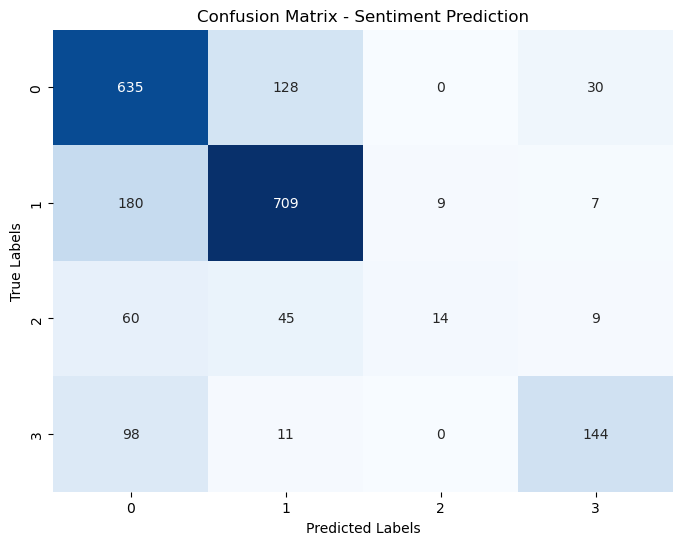

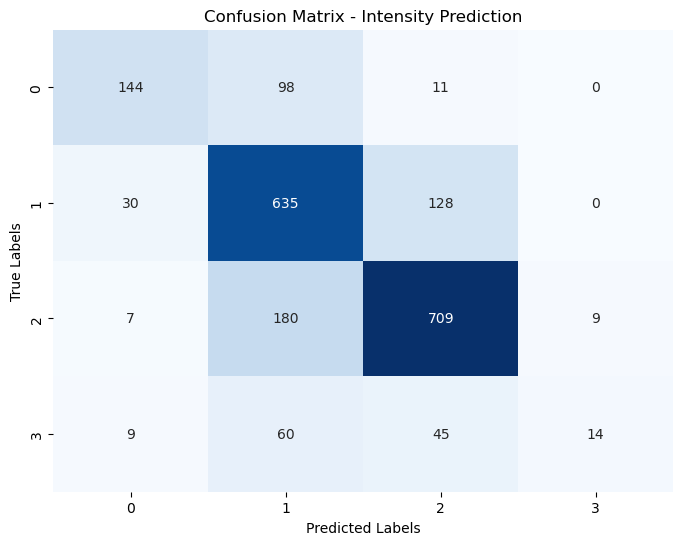

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix for sentiment prediction
conf_matrix_sentiment = confusion_matrix(y_test['predicted'], y_sentiment_predicted)
# confusion matrix for intensity prediction
conf_matrix_intensity = confusion_matrix(y_test['intensity'], y_intensity_predicted)

# plot sentiment
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Sentiment Prediction')
plt.show()

# plot intensity 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_intensity, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Intensity Prediction')
plt.show()

## Precision, Recall, and F1-score

precision, recall, and F1-score collectively provide insights into different aspects of a classifier's performance. They help in understanding how well the model identifies positive instances (recall), how accurately it predicts positive instances (precision), and how balanced it is between precision and recall (F1-score)

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
# for sentiment 
precision_sentiment = precision_score(y_test['predicted'],y_sentiment_predicted, average='weighted')
recall_sentiment = recall_score(y_test['predicted'],y_sentiment_predicted, average='weighted')
f1_score_sentiment = f1_score(y_test['predicted'],y_sentiment_predicted, average='weighted')
# for intensity 
precision_intensity = precision_score(y_test['intensity'],y_intensity_predicted, average='weighted')
recall_intensity = recall_score(y_test['intensity'],y_intensity_predicted, average='weighted')
f1_score_intensity = f1_score(y_test['intensity'],y_intensity_predicted, average='weighted')

print("Sentiment Prediction Metrics:")
print("Precision:", precision_sentiment)
print("Recall:", recall_sentiment)
print("F1-score:", f1_score_sentiment)
print("\nIntensity Prediction Metrics:")
print("Precision:", precision_intensity)
print("Recall:", recall_intensity)
print("F1-score:", f1_score_intensity)


Sentiment Prediction Metrics:
Precision: 0.7242501734552278
Recall: 0.7224627224627225
F1-score: 0.7081399914365307

Intensity Prediction Metrics:
Precision: 0.7242501734552278
Recall: 0.7224627224627225
F1-score: 0.7081399914365307


# Summary 

The sentiment and intensity prediction models both achieve an accuracy rate of approximately 72.25%, indicating their ability to correctly classify instances in the test dataset. Precision, recall, and F1-score metrics, which measure the models' precision-recall balance, align closely between the two tasks, hovering around 0.724. These metrics collectively suggest that the models effectively balance precision and recall in their predictions. While the models exhibit consistent performance, there's room for further analysis to identify areas of improvement and refine the models predictive capabilities. Examining misclassifications and exploring domain-specific features could offer insights to enhance the models effectiveness in sentiment and intensity prediction tasks. Additionally, hyperparameter tuning presents a method to systematically optimize model performance by identifying the best hyperparameter configurations, potentially leading to improved accuracy and generalization on unseen data.The performance of the sentiment and intensity prediction models, with an accuracy  72.25% and balanced precision-recall metrics, suggests that the models do identify mental health sentiment in patients.